In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
file_id = '1xT-z6iGBwpWYABzrBHWFUFmncuFoTVFp' #-- Updated File ID for my zip
file_obj = drive.CreateFile({'id': file_id})
file_obj.GetContentFile('Finance_Data_Exc.zip') 

In [ ]:
from zipfile import ZipFile
zip = ZipFile('Finance_Data_Exc.zip')
zip.namelist()

In [4]:
csvfile = zip.open('Finance_Data_Exc/PART_II_Financial_Data/djia.csv')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [6]:
dow = pd.read_csv(csvfile, index_col="Date", parse_dates=["Date"])

In [7]:
dow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7307 entries, 1989-12-29 to 2018-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7307 non-null   float64
 1   High       7307 non-null   float64
 2   Low        7307 non-null   float64
 3   Close      7307 non-null   float64
 4   Adj Close  7307 non-null   float64
 5   Volume     7307 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 399.6 KB


In [9]:
dow.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1989-12-29,2736.35,2763.01,2726.96,2753.20,2753.20,14580000
1990-01-02,2748.72,2811.65,2732.51,2810.15,2810.15,20680000
1990-01-03,2814.20,2834.04,2786.26,2809.73,2809.73,23620000
1990-01-04,2804.39,2821.46,2766.42,2796.08,2796.08,24370000
1990-01-05,2786.90,2810.15,2758.11,2773.25,2773.25,20290000


In [10]:
# We are gonna work with close price

dow = dow.Close.to_frame()

In [11]:
#Creating a simple moving average

dow["SMA50"] = dow.Close.rolling(window= 50).mean()

In [12]:
dow["SMA200"] = dow.Close.rolling(window= 200).mean()

In [14]:
dow.tail()  # Both mov avg columns added

,Close,SMA50,SMA200
Date,,,
2018-12-21,22445.37,24914.1782,25046.02945
2018-12-24,21792.20,24848.9656,25028.31175
2018-12-26,22878.45,24799.7348,25016.81095
2018-12-27,23138.82,24757.5002,25007.46990
2018-12-28,23062.40,24702.7798,24998.99130


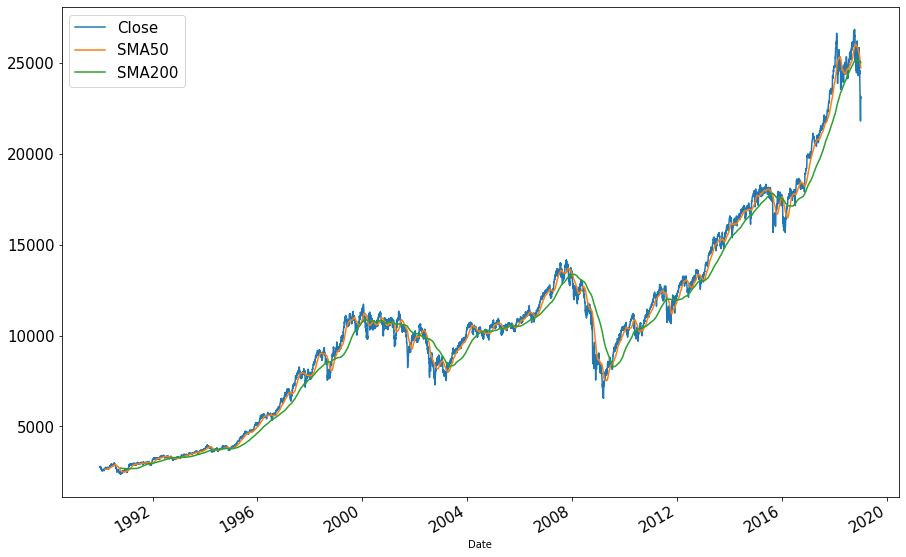

In [15]:
dow.plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [18]:
# Good strategy to invest when SMA 50 > SMA 100

investment_1 = dow.loc["2018-12-28"]

investment_1  "2017-05-15"

Close     23062.4000
SMA50     24702.7798
SMA200    24998.9913
Name: 2018-12-28 00:00:00, dtype: float64

In [20]:
investment_2 = dow.loc["2017-05-15"]
investment_2  # Investmemt 2 would be better choice & the investor would have invested using the momentum strategy

Close     20981.94000
SMA50     20786.48160
SMA200    19522.93675
Name: 2017-05-15 00:00:00, dtype: float64

In [55]:
dow_m = dow.Close.resample("M", kind ="period").last().to_frame()

In [56]:
dow_m

,Close
Date,
1989-12,2753.20
1990-01,2590.54
1990-02,2627.25
1990-03,2707.21
1990-04,2656.76
...,...
2018-08,25964.82
2018-09,26458.31
2018-10,25115.76


In [57]:
#To calculate monthly simple return

dow_m["Return"] = dow_m.pct_change()

In [58]:
dow_m.head()

,Close,Return
Date,,
1989-12,2753.20,NaN
1990-01,2590.54,-0.059080
1990-02,2627.25,0.014171
1990-03,2707.21,0.030435
1990-04,2656.76,-0.018635


In [59]:
dow_m["Roll_Return(36 Months)"] = dow_m.Return.rolling(36).mean()

In [60]:
dow_m.tail()

,Close,Return,Roll_Return(36 Months)
Date,,,
2018-08,25964.82,0.021626,0.013058
2018-09,26458.31,0.019006,0.013995
2018-10,25115.76,-0.050742,0.010233
2018-11,25538.46,0.016830,0.010612
2018-12,23062.40,-0.096954,0.008381


In [62]:
dow_m["Roll_Risk(36 Months)"] = dow_m.Return.rolling(36).std()

In [63]:
dow_m.tail()

,Close,Return,Roll_Return(36 Months),Roll_Risk(36 Months)
Date,,,,
2018-08,25964.82,0.021626,0.013058,0.030036
2018-09,26458.31,0.019006,0.013995,0.029668
2018-10,25115.76,-0.050742,0.010233,0.029029
2018-11,25538.46,0.016830,0.010612,0.029023
2018-12,23062.40,-0.096954,0.008381,0.033862


In [64]:
#Annualized rolling return
dow_m["Roll_Return(36 Months)"] = dow_m["Roll_Return(36 Months)"]* 12
dow_m["Roll_Risk(36 Months)"] = dow_m["Roll_Risk(36 Months)"]* np.sqrt(12)


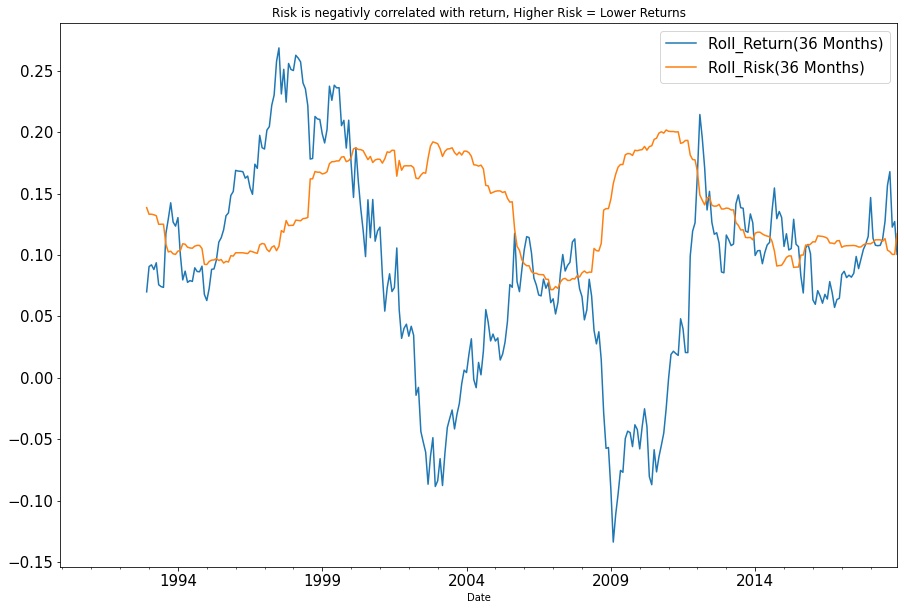

In [67]:
dow_m.iloc[:, -2:].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Risk is negativly correlated with return, Higher Risk = Lower Returns")
plt.show()